# EDP = Exploratory Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from matplotlib_venn import venn2
from tqdm import tqdm


In [2]:
import src.functions as functions
import src.datasets as datasets 
import src.model_selection as model_selection 

# import custom functions
from src.functions import plot_correlations, plot_mutual_info, hello
from src.datasets import xy_train, xy_train_test, data_50000
from src.model_selection import validation_accuracy_score, rfe_evaluation_cv, skb_evaluation_cv

## Balanced vs original


In [3]:
df_original = datasets.data_original()
df_balanced = datasets.data_balanced()

In [4]:
rfe_original = rfe_evaluation_cv(dataset = df_original)

In [5]:
rfe_balanced = rfe_evaluation_cv(dataset = df_balanced)

In [6]:
skb_original = skb_evaluation_cv(dataset = df_original)

In [7]:
skb_balanced = skb_evaluation_cv(dataset = df_balanced)

In [8]:
rfe_original['label'] = "RFE original"
rfe_balanced['label'] = "RFE balanced"
skb_original['label'] = 'SKB original'
skb_balanced['label'] = 'SKB balanced'

In [9]:
rfe_original.head()

,score,features,label
k,,,
1,0.8130,[time],RFE original
2,0.8311,"[time, offtrt]",RFE original
3,0.8527,"[time, offtrt, cd420]",RFE original
4,0.8580,"[time, race, offtrt, cd420]",RFE original
5,0.8615,"[time, preanti, race, offtrt, cd420]",RFE original


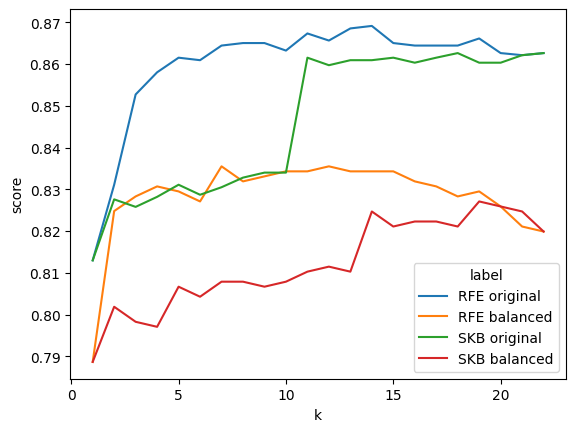

In [10]:
results_all = pd.concat([rfe_original, rfe_balanced, skb_original, skb_balanced])

sns.lineplot(data = results_all, x = "k", y = "score", hue = "label")
plt.show()

## feature engineering on the variable time


In [12]:
df_time2 = df_original.copy()
df_time2["time**2"] = df_time2['time']**2

In [13]:
df_time2.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,time**2
0,948,2,48,89.8128,0,0,0,100,0,0,...,1,0,1,0,422,477,566,324,0,898704
1,1002,3,61,49.4424,0,0,0,90,0,1,...,3,0,1,0,162,218,392,564,1,1004004
2,961,3,45,88.4520,0,1,1,90,0,1,...,3,0,1,1,326,274,2063,1893,0,923521
3,1166,3,47,85.2768,0,1,0,100,0,1,...,3,0,1,0,287,394,1590,966,0,1359556
4,1090,0,43,66.6792,0,1,0,100,0,1,...,3,0,0,0,504,353,870,782,0,1188100


In [14]:
rfe_time2 = rfe_evaluation_cv(dataset = df_time2)

In [15]:
skb_time2 = skb_evaluation_cv(dataset = df_time2)

In [16]:
rfe_time2['label'] = "RFE time^2"
skb_time2['label'] = 'SKB time^2'

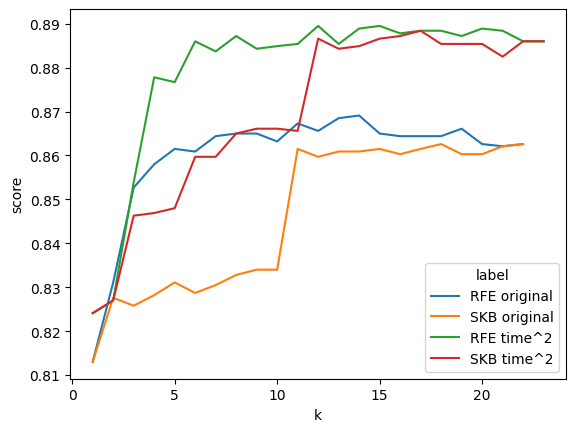

In [17]:
results_all = pd.concat([rfe_original, skb_original, rfe_time2, skb_time2])

sns.lineplot(data = results_all, x = "k", y = "score", hue = "label")
plt.show()

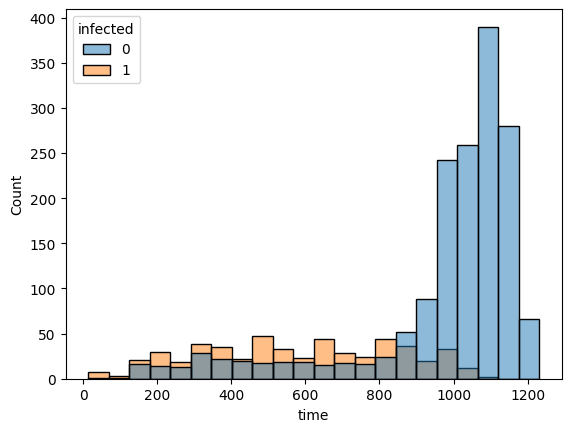

In [18]:
sns.histplot(data = df_original, x = "time", hue = "infected")
plt.show()

In [26]:
df_time730 = df_original.copy()
df_time730["time730"] = (df_time730['time'] > 730).astype(int) * (df_time730['time'] - 730)
df_time7300 = df_time730.copy()
df_time730 = df_time730.drop(columns = ['time'])

In [23]:
rfe_time730 = rfe_evaluation_cv(dataset = df_time730)
skb_time730 = skb_evaluation_cv(dataset = df_time730)

rfe_time730['label'] = "RFE time730"
skb_time730['label'] = 'SKB time730'

In [27]:
rfe_time7300 = rfe_evaluation_cv(dataset = df_time7300)
skb_time7300 = skb_evaluation_cv(dataset = df_time7300)

rfe_time7300['label'] = "RFE time7300"
skb_time7300['label'] = 'SKB time7300'

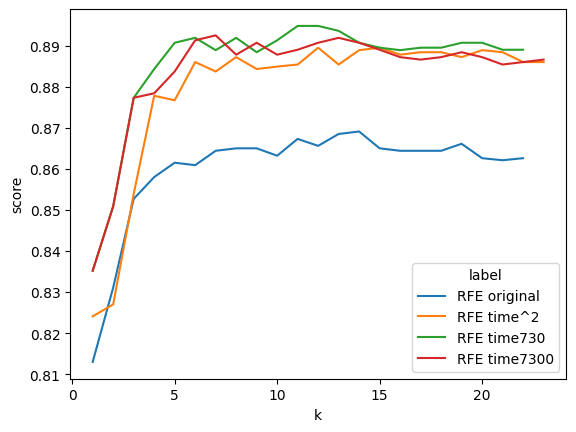

In [28]:


results_all = pd.concat([rfe_original, rfe_time2, rfe_time730, rfe_time7300])

sns.lineplot(data = results_all, x = "k", y = "score", hue = "label")
plt.show()

